<a href="https://colab.research.google.com/github/setyawan1234/PCVK_GENAP_2023/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np 
import pandas as pd 
from skimage import io 
import matplotlib.pyplot as plt
import math
import os
import glob
import cv2 as cv
from google.colab.patches import cv2_imshow

height,widht dan depth pada gambar 512 512 3


<BarContainer object of 256 artists>

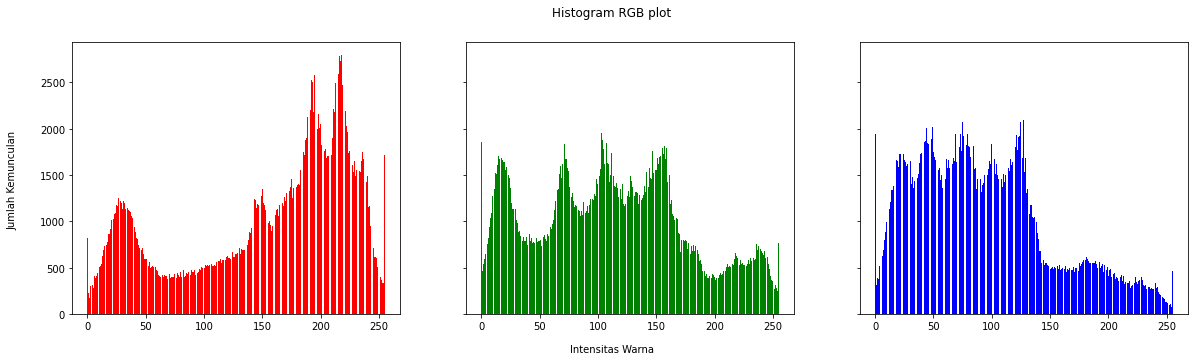

In [3]:
# nomor 3 histogram menggunakan perulangan

# import gambar lena.jpg
original_image = cv.imread('/content/drive/MyDrive/PCVK/wekk6/lena.jpg')

# untuk mengetahui nilai dari height, width, depth
height, width, depth = np.shape(original_image)

names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

# Perhitungan histogran menggunakan perulangan
for y in range(height):
  for x in range(width):
    red[original_image[y][x][2]] += 1
    green[original_image[y][x][1]] += 1
    blue[original_image[y][x][0]] += 1

# Membuat area subplots
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)

fig.suptitle('Histogram RGB plot')
fig.text(0.08, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.02, 'Intensitas Warna', ha='center')

print('height,widht dan depth pada gambar' , height, width,depth)

# Plot histograms
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

Text(0.5, 1.0, 'Blue channel')

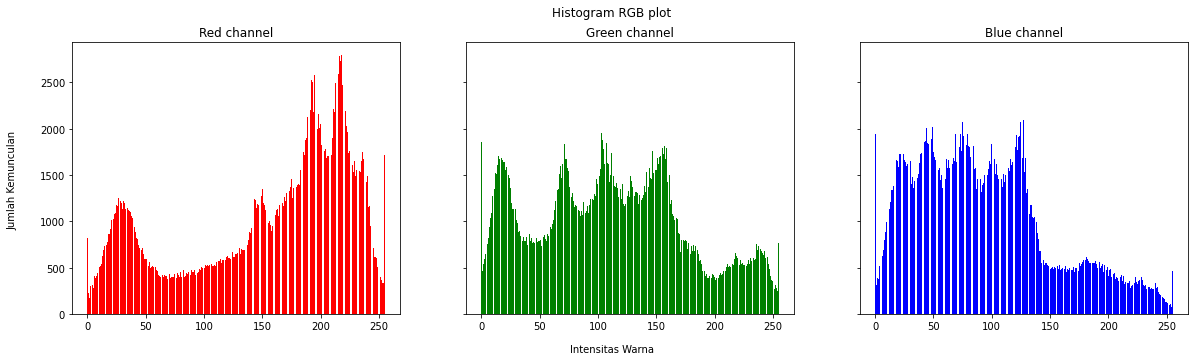

In [4]:
# nomor 4 histogram menggunakan np.histogram

# import gambar
original_image = cv.imread('/content/drive/MyDrive/PCVK/wekk6/lena.jpg')

names=np.arange(256)

red_hist = [0]*256
green_hist = [0]*256
blue_hist = [0]*256

# Perhitungan histogram untuk beberapa channel
red_hist,_ = np.histogram(original_image[:, :, 2], bins=256, range=(0, 256))
green_hist,_ = np.histogram(original_image[:, :, 1], bins=256, range=(0, 256))
blue_hist,_ = np.histogram(original_image[:, :, 0], bins=256, range=(0, 256))

# Membuat area subplots
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)

# Plot histograms
axs[0].bar(names, red_hist, color='red')
axs[1].bar(names, green_hist, color='green')
axs[2].bar(names, blue_hist, color='blue')

# Set judul dan label
fig.suptitle('Histogram RGB plot')
fig.text(0.08, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.02, 'Intensitas Warna', ha='center')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')

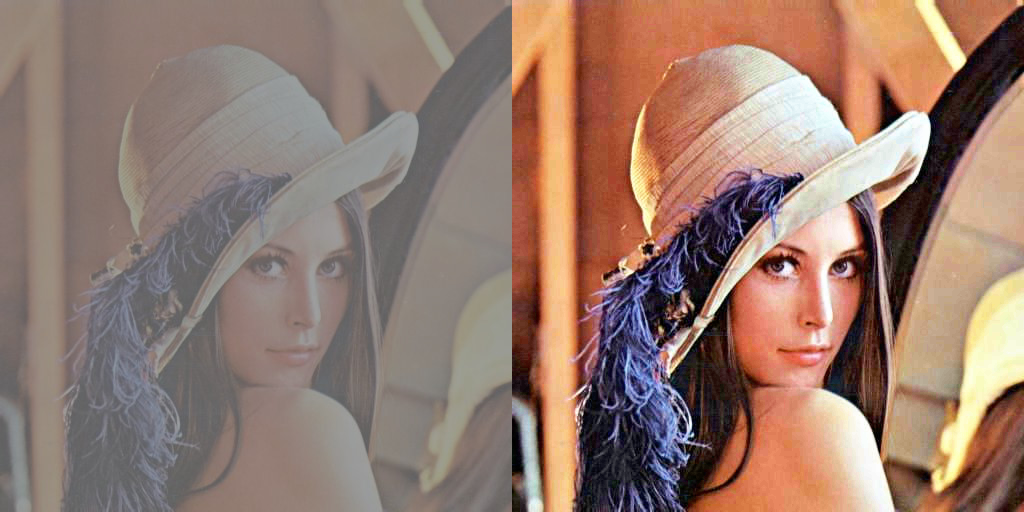

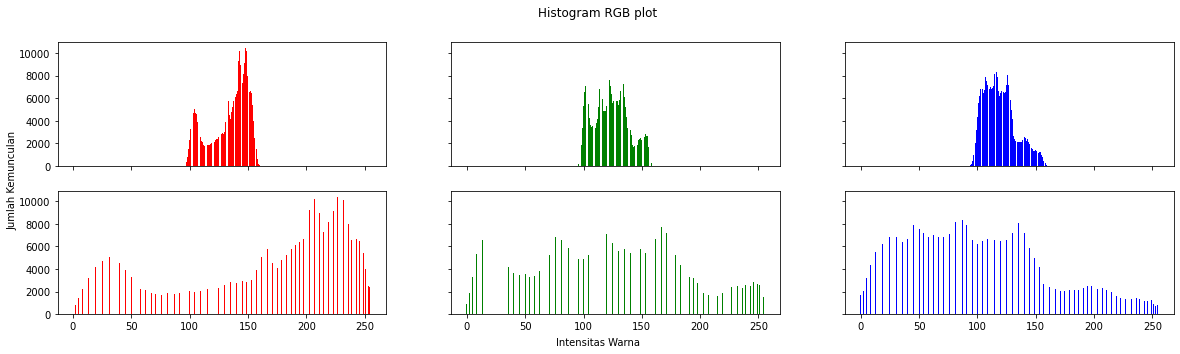

In [5]:
# No 5 Membuat histogram citra seperti output histogram equalization
img = cv.imread('/content/drive/MyDrive/PCVK/wekk6/lena_lc.jpg') 
def histog(img):
  # untuk mengetahui nilai dari height, width, depth
  height, width, depth = np.shape(img) 
  
  ax = np.zeros((3,256)) 
  for y in range(0,height) : 
    for x in range(0,width) :
      ax[0][img[y][x][0]] += 1 
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1 
  return ax

histogram_asli = histog(img)

#convert to Numpy array 
img_array = np.asarray(img)

#Langkah 1: Histogram kumulatif yang dinormalisasi
#ratakan larik gambar dan hitung histogram melalui binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#Normalisasi 
num_pixels = np. sum(histogram_array) 
histogram_array = histogram_array/num_pixels

# histogram kumulatif yang dinormalisasi
chistogram_array = np.cumsum(histogram_array)

#Langkah 2: Tabel pencarian pemetaan piksel
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Langkah 3: Transformasi
#ratakan gambar menjadi 10 daftar 
img_list = list(img_array.flatten())

# mengubah nilai piksel untuk menyamakan 
eq_img_list = [transform_map[p] for p in img_list]

# bentuk ulang dan tulis kembali ke dalam img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape) 
img1 = eq_img_array

equal_histo = histog(img1)

final_frame = cv.hconcat((img, img1)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256) 
isgrayimg = np.array_equal(blue, green, red) 
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histogram_asli[2], color='red') 
  axs[0,1].bar(names, histogram_asli[1], color='green') 
  axs[0,2].bar(names, histogram_asli[0], color='blue') 
  axs[1,0].bar(names, equal_histo[2], color='red') 
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue') 
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True) 
  fig. suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histogram_asli[2], color='gray') 
  axs[0,1].bar(names, equal_histo[2], color='gray')

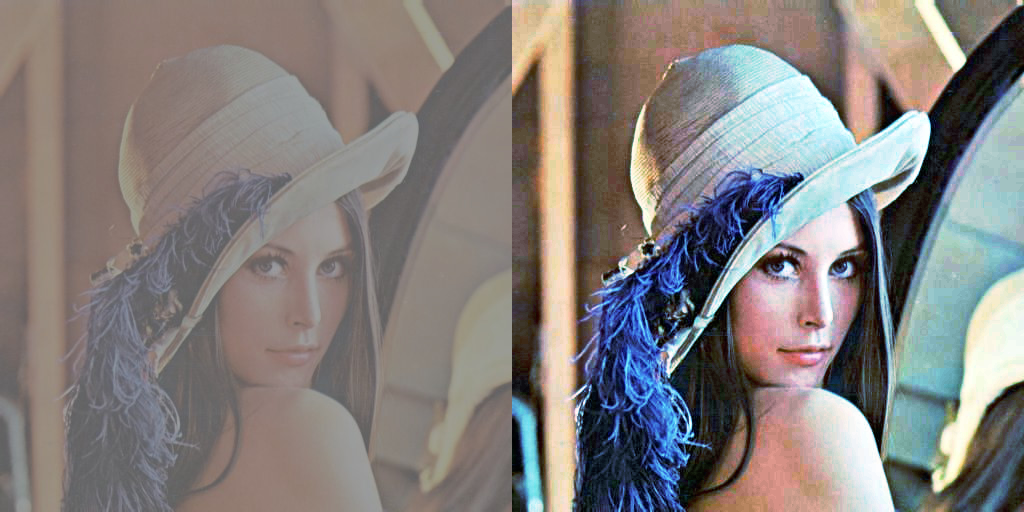

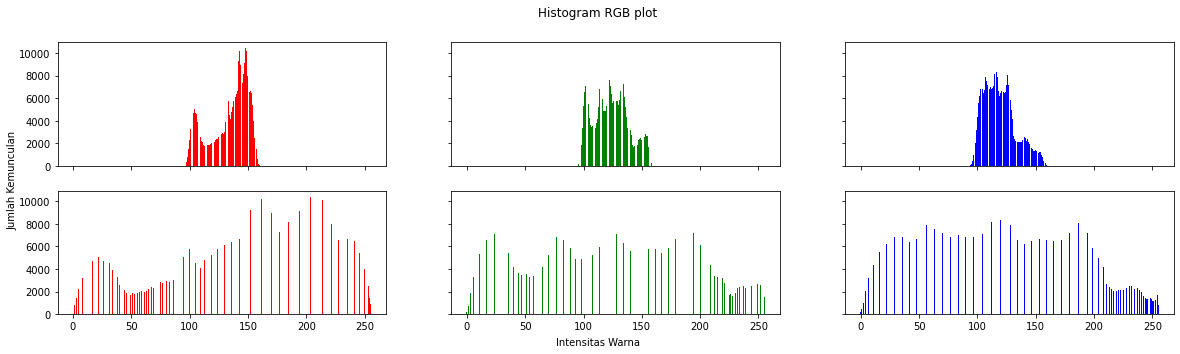

In [6]:
# nomor 6
#No 6
# Histogram equalization using library
img = cv.imread('/content/drive/MyDrive/PCVK/wekk6/lena_lc.jpg') 
channels = cv.split(img)
eq_channels = []
for ch, color in zip(channels, ['R', 'G', 'B']):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histogram_asli[2], color='red') 
  axs[0,1].bar(names, histogram_asli[1], color='green') 
  axs[0,2].bar(names, histogram_asli[0], color='blue') 
  axs[1,0].bar(names, equal_histo[2], color='red') 
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue') 
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True) 
  fig. suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histogram_asli[2], color='gray') 
  axs[0,1].bar(names, equal_histo[2], color='gray')

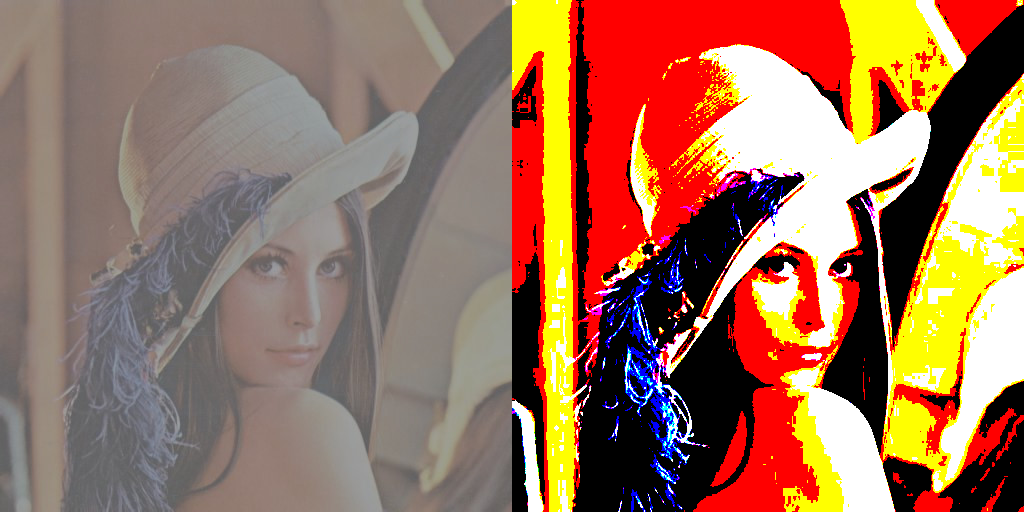

In [7]:
# No 7 Proses pemetaan 16 juta warna RGB ke dalam 8 warna
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]
    
img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)

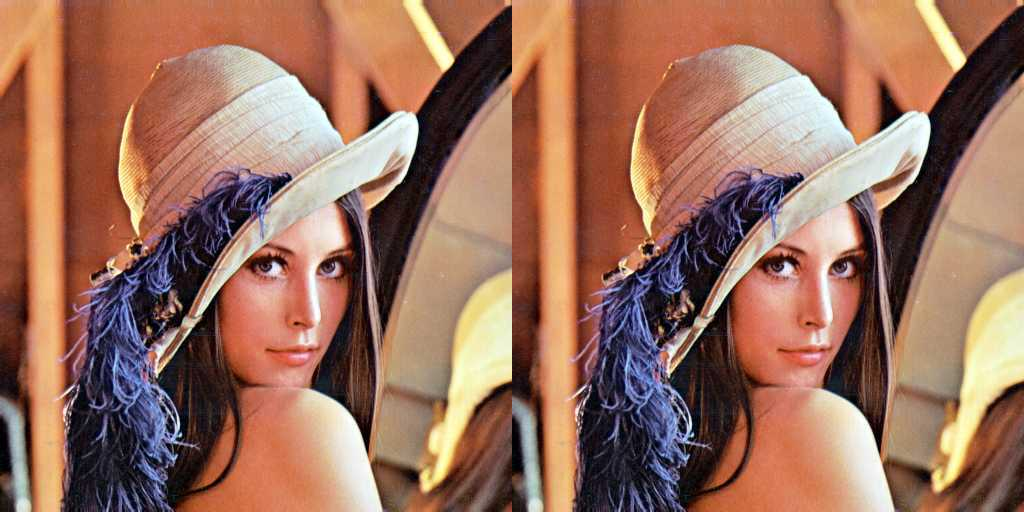

In [12]:
from PIL import Image

# Import gambar dan konversi gambar yang sudah diimport kedalam RGB dengan menggunakan Floyd-Steinberg dithering 
imageConvert = Image.open('/content/drive/MyDrive/PCVK/wekk6/lena.jpg').convert(mode='RGB', dither=Image.FLOYDSTEINBERG)
imageConvert.save('/content/drive/MyDrive/PCVK/wekk6/lena2.jpg')

# Load gambar original
ImageOriginal = cv.imread('/content/drive/MyDrive/PCVK/wekk6/lena.jpg')

# Load gambar dithering
ImageDithered = cv.imread('/content/drive/MyDrive/PCVK/wekk6/lena2.jpg')

# Display the original and dithered images
final_frame = cv.hconcat((ImageOriginal, ImageDithered))
cv2_imshow(final_frame)

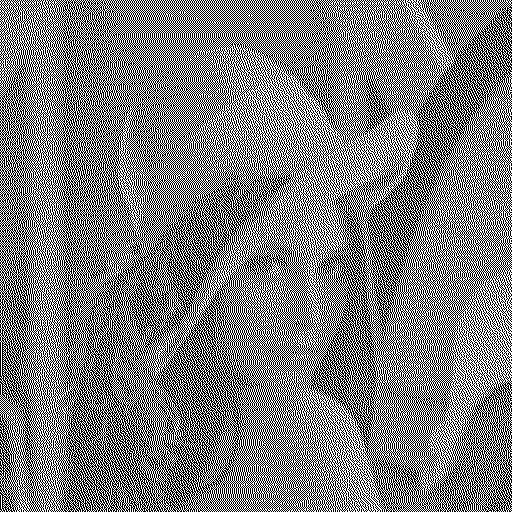

In [13]:
from PIL import Image
import cv2

imageLena = Image.open('/content/drive/MyDrive/PCVK/wekk6/lena_lc.jpg').convert(mode='1',dither=Image.FLOYDSTEINBERG)
imageLena.save('/content/drive/MyDrive/PCVK/wekk6/lena_lc.jpg')


Image = cv2.imread('/content/drive/MyDrive/PCVK/wekk6/lena_lc.jpg')
Image2 = cv2.imread('/content/drive/MyDrive/PCVK/wekk6/lena_lc.jpg')
image_2 = cv.cvtColor(Image2, cv.COLOR_BGR2RGB)

FloydSteinberg = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('/content/drive/MyDrive/PCVK/wekk6/lena_lc.jpg', FloydSteinberg)


# implementasikan proses dithering Floyd and Steinberg
Height = FloydSteinberg.shape[0]
Width = FloydSteinberg.shape[1]

for y in range(0, Height):
    for x in range(0, Width):

        old_value = FloydSteinberg[y, x]
        new_value = 0
        if (old_value > 128) :
            new_value = 255

        FloydSteinberg[y, x] = new_value

        Error = old_value - new_value

        if (x<Width-1):
            NewNumber = FloydSteinberg[y, x+1] + Error * 7 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            FloydSteinberg[y, x+1] = NewNumber

        if (x>0 and y<Height-1):
            NewNumber = FloydSteinberg[y+1, x-1] + Error * 3 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            FloydSteinberg[y+1, x-1] = NewNumber

        if (y<Height-1):
            NewNumber= FloydSteinberg[y+1, x] + Error * 5 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            FloydSteinberg[y+1, x] = NewNumber

        if (y<Height-1 and x<Width-1):
            NewNumber = FloydSteinberg[y+1, x+1] + Error * 1 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            FloydSteinberg[y+1, x+1] = NewNumber

# cv2.imshow(Image)
cv2.imwrite('/content/drive/MyDrive/PCVK/wekk6/lena_lc.jpg', FloydSteinberg)


cv2_imshow(FloydSteinberg)